# HW4
We will be working on a very cool problem which is classifying hand signs. In each image the hand is holding certain number of fingers up. The number of fingers held by the hand is the class number. The original dataset is in a format call h5 format. It is an efficient format to store and organize large amounts of data. [Click here to read more about it](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). The following function `load_dataset()` is ready for you to use. It will return four variables in the following order: X_train, Y_train, X_test, Y_test. Hence, your data is already splitted and there is no need for you to split it.

You can download the training datafile here https://drive.google.com/open?id=1vcbjJMj4RuuuqayUu40ScHJdSY4DZOrj

You can download the test datafile here https://drive.google.com/open?id=1rQ1RCIBzw7ho_n6x0vbMzdZ8fAzi1hIQ

Make sure you have both on the same directory as your notebook

In [1]:
# import libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

Using TensorFlow backend.


load the dataset 

In [2]:
#load your dataset here

# initialize train and test data with given function
x_train, y_train, x_test, y_test = load_dataset()

Generate 20 random numbers between 0 and the length of the training dataset. Plot 20 images from the dataset using these 20 random numbers as indicies to the training dataset. You will need to plot them on 5 rows and 4 columns. In addition, each image will have a title that says `this image belons to class number X`, replace X by the correct class number from the training labels.

<Figure size 3600x2880 with 0 Axes>

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [3]')

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [4]')

Text(0.5, 1.0, 'This image belongs to class number [4]')

Text(0.5, 1.0, 'This image belongs to class number [4]')

Text(0.5, 1.0, 'This image belongs to class number [1]')

Text(0.5, 1.0, 'This image belongs to class number [3]')

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [1]')

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [3]')

Text(0.5, 1.0, 'This image belongs to class number [5]')

Text(0.5, 1.0, 'This image belongs to class number [0]')

Text(0.5, 1.0, 'This image belongs to class number [1]')

Text(0.5, 1.0, 'This image belongs to class number [0]')

Text(0.5, 1.0, 'This image belongs to class number [1]')

Text(0.5, 1.0, 'This image belongs to class number [2]')

Text(0.5, 1.0, 'This image belongs to class number [3]')

Text(0.5, 1.0, 'This image belongs to class number [0]')

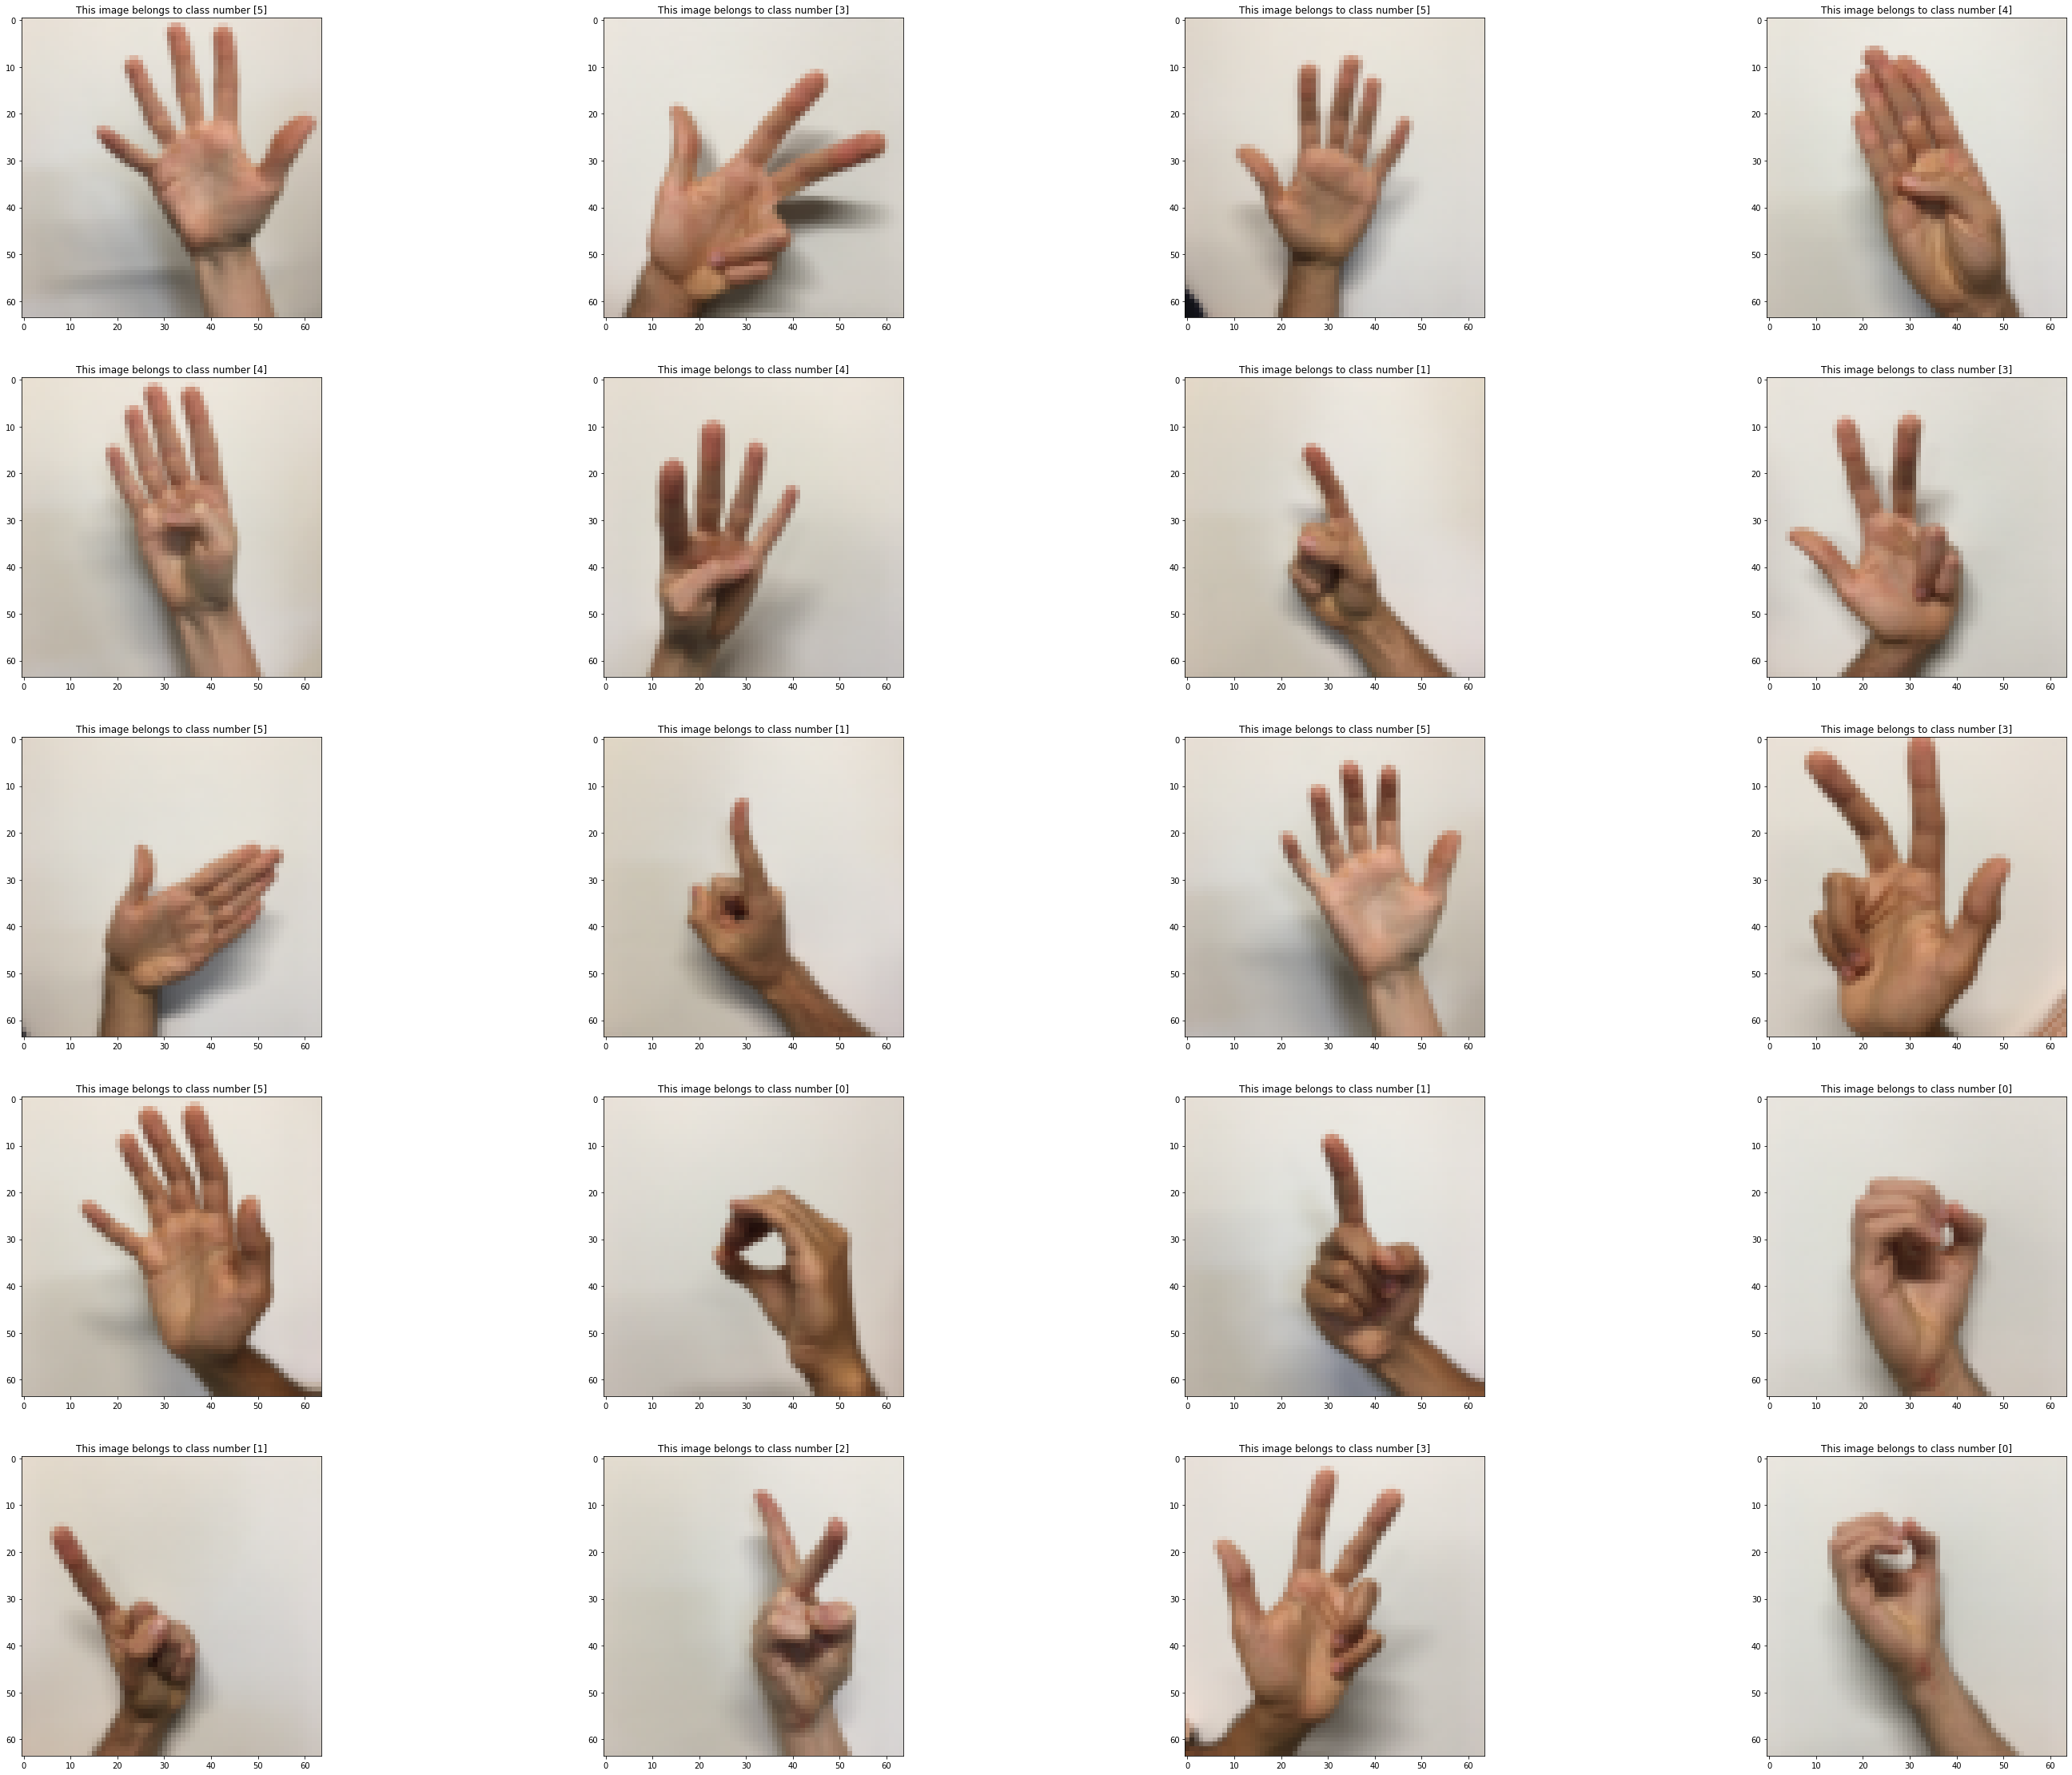

In [3]:
# Plot here

# generate 20 random integers for the plots
rand = np.random.randint(low=0, high=len(x_train)-1, size=20).tolist()
plt.figure(figsize=(50,40))

# loop to iterate through the list and plot images
for i in rand:
    plt.subplot(5,4, rand.index(i)+1)
    plt.imshow(x_train[i])
    plt.title('This image belongs to class number {}'.format(y_train[i]))
    
# double click image plots to enlarge

How many classes does the training and test dataset have?

In [4]:
# solve here

# unique class values and count for training labels
np.unique(y_train)
len(np.unique(y_train))

# unique class values and count for testing labels
np.unique(y_test)
len(np.unique(y_test))

array([0, 1, 2, 3, 4, 5])

6

array([0, 1, 2, 3, 4, 5])

6

What is the dimension of the training dataset and test dataset?

In [5]:
# solve here

# check the dimensions or the train and test set
x_train_dim = x_train.shape
x_test_dim = x_test.shape
x_train_dim
x_test_dim
y_train.shape
y_test.shape

(1080, 64, 64, 3)

(120, 64, 64, 3)

(1080, 1)

(120, 1)

As you can see in the dimension (number_images X length X width X RGB), each image has 3 dimensions .. number of pixels in length and width as well as RGB contrast. We needed to flatten both the training and the test dataset so that we can feed to our ML models. To flatten an image, check the following link. https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

In [6]:
# solve here

# caluclate the new width for train and test data
x_train_dim_wid = x_train_dim[1]*x_train_dim[2]*x_train_dim[3]
x_test_dim_wid = x_test_dim[1]*x_test_dim[2]*x_test_dim[3]

# flatten and reshape train and test data
x_train_pix = x_train.flatten().reshape(x_train_dim[0], x_train_dim_wid)
x_test_pix = x_test.flatten().reshape(x_test_dim[0], x_test_dim_wid)

# verify the reshaped dimensions
x_train_pix.shape
x_test_pix.shape

(1080, 12288)

(120, 12288)

Now we need to normalize the training and test dataset. The pixels are integers. We need them to be float between 0 and 1. You need to divide each of the two matrices by its max. That will produce a normalized image datasets

In [7]:
# Solve Here

# divide matrices by respective max
x_train_pix = x_train_pix/x_train_pix.max()
x_test_pix = x_test_pix/x_test_pix.max()

# verify the change to floats between 0 and 1
x_train_pix.shape
x_test_pix.shape
y_train.shape
y_test.shape

(1080, 12288)

(120, 12288)

(1080, 1)

(120, 1)

Now you can apply ML. Start with a baseline model such as logistic regression. Fit the model, then evaluate the model by calculating the accuracy and the confusion matrix for the training data and test data. Note, fitting the model may take longer than a minute

In [8]:
# Solve here
logreg = LogisticRegression().fit(x_train_pix, y_train)

train_pred = logreg.predict(x_train_pix)
test_pred = logreg.predict(x_test_pix)

metrics.accuracy_score(y_train, train_pred)
metrics.accuracy_score(y_test, test_pred)

metrics.confusion_matrix(y_train, train_pred)
metrics.confusion_matrix(y_test, test_pred)

/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

0.8916666666666667

array([[180,   0,   0,   0,   0,   0],
       [  0, 180,   0,   0,   0,   0],
       [  0,   0, 180,   0,   0,   0],
       [  0,   0,   0, 180,   0,   0],
       [  0,   0,   0,   0, 180,   0],
       [  0,   0,   0,   0,   0, 180]])

array([[20,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0],
       [ 0,  1, 18,  1,  0,  0],
       [ 1,  0,  0, 18,  0,  1],
       [ 0,  0,  2,  1, 14,  3],
       [ 0,  0,  1,  1,  1, 17]])

Use Keras to build a small neural network. Number of hidden layers is less than 5 and each layer should have between 5 and 10 neurons. The loss for a multiclass keras problem is called `categorical_crossentropy`

**Note**: You will need to convert the labels using the one hot class encoder as we did in the lecture

In [9]:
# Solve Here
# prepare data for tensorflow multi labels
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(y_train)

# 3. Transform
onehotlabels_train = enc.transform(y_train).toarray()
onehotlabels_test = enc.transform(y_test).toarray()

from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(6, input_shape = (x_train_pix.shape[1],), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_pix, onehotlabels_train, epochs=100, batch_size=10, \
          validation_data=(x_test_pix, onehotlabels_test))

model.evaluate(x_train_pix, onehotlabels_train)
model.evaluate(x_test_pix, onehotlabels_test)

/miniconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

Train on 1080 samples, validate on 120 samples
Epoch 1/100
1080/1080 [==============================] - 1s 786us/step - loss: 1.8494 - acc: 0.1472 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 2/100
1080/1080 [==============================] - 0s 316us/step - loss: 1.7922 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 3/100
1080/1080 [==============================] - 0s 326us/step - loss: 1.7920 - acc: 0.1481 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 4/100
1080/1080 [==============================] - 0s 308us/step - loss: 1.7922 - acc: 0.1463 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 5/100
1080/1080 [==============================] - 0s 323us/step - loss: 1.7920 - acc: 0.1593 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 6/100
1080/1080 [==============================] - 0s 310us/step - loss: 1.7920 - acc: 0.1574 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 7/100
1080/1080 [==============================] - 0s 313us/step - loss: 1.7920 - acc: 0.1546 - val_loss: 1.7918 - val_acc: 0

1080/1080 [==============================] - 0s 314us/step - loss: 1.7922 - acc: 0.1565 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 61/100
1080/1080 [==============================] - 0s 321us/step - loss: 1.7920 - acc: 0.1509 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 62/100
1080/1080 [==============================] - 0s 327us/step - loss: 1.7920 - acc: 0.1574 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 63/100
1080/1080 [==============================] - 0s 333us/step - loss: 1.7921 - acc: 0.1528 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 64/100
1080/1080 [==============================] - 0s 311us/step - loss: 1.7921 - acc: 0.1519 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 65/100
1080/1080 [==============================] - 0s 315us/step - loss: 1.7921 - acc: 0.1370 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 66/100
1080/1080 [==============================] - 0s 344us/step - loss: 1.7920 - acc: 0.1481 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 67/100
1080/1080 [=======================

[1.7917608614321108, 0.16666666672185615]

120/120 [==============================] - 0s 90us/step


[1.7917608499526978, 0.16666666666666666]

Did you notice that the learning is slow? As if it is not moving? That is because of the learning rate. Change the compiling line for the model to `model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])` so that you can decrease the learning rate. Moreover, this is a good chance to read about the different optimizers type. Check this link.
https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3

Run your network for at least 300 epochs and use batch_size=100

What is the training and validation accuracy and confusion matrix for both?

**Note this will take few minutes to finish**

In [10]:
# Solve Here
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
history = model.fit(x_train_pix, onehotlabels_train, epochs=300, batch_size=100, \
          validation_data=(x_test_pix, onehotlabels_test))

train_pred = model.predict(x_train_pix)
test_pred = model.predict(x_test_pix)

model.evaluate(x_train_pix, onehotlabels_train)
model.evaluate(x_test_pix, onehotlabels_test)

metrics.confusion_matrix(onehotlabels_train, train_pred)
metrics.confusion_matrix(onehotlabels_test, test_pred)

Train on 1080 samples, validate on 120 samples
Epoch 1/300
1080/1080 [==============================] - 1s 504us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 2/300
1080/1080 [==============================] - 0s 130us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 3/300
1080/1080 [==============================] - 0s 111us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 4/300
1080/1080 [==============================] - 0s 109us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 5/300
1080/1080 [==============================] - 0s 108us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 6/300
1080/1080 [==============================] - 0s 111us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 7/300
1080/1080 [==============================] - 0s 132us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0

1080/1080 [==============================] - 0s 109us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 61/300
1080/1080 [==============================] - 0s 107us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 62/300
1080/1080 [==============================] - 0s 112us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 63/300
1080/1080 [==============================] - 0s 115us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 64/300
1080/1080 [==============================] - 0s 108us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 65/300
1080/1080 [==============================] - 0s 110us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 66/300
1080/1080 [==============================] - 0s 109us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 67/300
1080/1080 [=======================

1080/1080 [==============================] - 0s 117us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 120/300
1080/1080 [==============================] - 0s 113us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 121/300
1080/1080 [==============================] - 0s 108us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 122/300
1080/1080 [==============================] - 0s 107us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 123/300
1080/1080 [==============================] - 0s 108us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 124/300
1080/1080 [==============================] - 0s 110us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 125/300
1080/1080 [==============================] - 0s 107us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 126/300
1080/1080 [================

1080/1080 [==============================] - 0s 117us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 179/300
1080/1080 [==============================] - 0s 112us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 180/300
1080/1080 [==============================] - 0s 111us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 181/300
1080/1080 [==============================] - 0s 109us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 182/300
1080/1080 [==============================] - 0s 108us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 183/300
1080/1080 [==============================] - 0s 107us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 184/300
1080/1080 [==============================] - 0s 111us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 185/300
1080/1080 [================

1080/1080 [==============================] - 0s 108us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 238/300
1080/1080 [==============================] - 0s 107us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 239/300
1080/1080 [==============================] - 0s 109us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 240/300
1080/1080 [==============================] - 0s 108us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 241/300
1080/1080 [==============================] - 0s 111us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 242/300
1080/1080 [==============================] - 0s 107us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 243/300
1080/1080 [==============================] - 0s 109us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 244/300
1080/1080 [================

1080/1080 [==============================] - 0s 107us/step - loss: 1.7918 - acc: 0.1556 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 297/300
1080/1080 [==============================] - 0s 108us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 298/300
1080/1080 [==============================] - 0s 109us/step - loss: 1.7918 - acc: 0.1639 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 299/300
1080/1080 [==============================] - 0s 109us/step - loss: 1.7918 - acc: 0.1667 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 300/300
1080/1080 [==============================] - 0s 78us/step


[1.7917596560937388, 0.16666666672185615]

120/120 [==============================] - 0s 91us/step


[1.7917596578598023, 0.16666666716337203]

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [ ]:
train_pred

Build a new model and increase the number of layers and neurons .. maybe 7 or 8 layers with number of neurons between 200 and 1000. Do you see a difference in the accuracy?


What is the training and validation accuracy and confusion matrix for both?

In [ ]:
# Solve Here

# model2 (below) reached 93.33% validation accuracy

model2 = Sequential()
model2.add(Dense(200, input_shape = (x_train_pix.shape[1],), activation='relu'))
model2.add(Dense(400, activation='relu'))
model2.add(Dense(600, activation='relu'))
model2.add(Dense(800, activation='relu'))
model2.add(Dense(800, activation='relu'))
model2.add(Dense(600, activation='relu'))
model2.add(Dense(400, activation='relu'))
model2.add(Dense(6, activation='softmax'))

# Compile model
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])
history = model2.fit(x_train_pix, onehotlabels_train, epochs=300, batch_size=100, \
          validation_data=(x_test_pix, onehotlabels_test))

model2.evaluate(x_train_pix, onehotlabels_train)
model2.evaluate(x_test_pix, onehotlabels_test)

**Bonus**

See if you can change some of the parameters so that you can reach for a validation accuracy of at least 92%

In [ ]:
# Solve Bonus Here

# model3 (below) reached 94.17% validation accuracy
model3 = Sequential()
model3.add(Dense(200, input_shape = (x_train_pix.shape[1],), activation='relu'))
model3.add(Dense(400, activation='relu'))
model3.add(Dense(600, activation='relu'))
model3.add(Dense(800, activation='relu'))
model3.add(Dense(800, activation='relu'))
model3.add(Dense(600, activation='relu'))
model3.add(Dense(400, activation='relu'))
model3.add(Dense(6, activation='softmax'))

# Compile model
model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.0003), metrics=['accuracy'])
history = model3.fit(x_train_pix, onehotlabels_train, epochs=300, batch_size=200, \
          validation_data=(x_test_pix, onehotlabels_test))

model3.evaluate(x_train_pix, onehotlabels_train)
model3.evaluate(x_test_pix, onehotlabels_test)

In [ ]:
# model4 (below) reached 94.17% validation accuracy
model4 = Sequential()
model4.add(Dense(200, input_shape = (x_train_pix.shape[1],), activation='relu'))
model4.add(Dense(400, activation='relu'))
model4.add(Dense(600, activation='relu'))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(600, activation='relu'))
model4.add(Dense(400, activation='relu'))
model4.add(Dense(6, activation='softmax'))

# Compile model
model4.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr = 0.00009), metrics=['accuracy'])
history = model4.fit(x_train_pix, onehotlabels_train, epochs=150, batch_size=25, \
          validation_data=(x_test_pix, onehotlabels_test))

model4.evaluate(x_train_pix, onehotlabels_train)
model4.evaluate(x_test_pix, onehotlabels_test)